In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns; sns.set()


In [2]:
df = pd.read_csv('owid-covid-data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15128 entries, 0 to 15127
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   iso_code                  14938 non-null  object 
 1   location                  15128 non-null  object 
 2   date                      15128 non-null  object 
 3   total_cases               15128 non-null  int64  
 4   new_cases                 15128 non-null  int64  
 5   total_deaths              15128 non-null  int64  
 6   new_deaths                15128 non-null  int64  
 7   total_cases_per_million   14836 non-null  float64
 8   new_cases_per_million     14836 non-null  float64
 9   total_deaths_per_million  14836 non-null  float64
 10  new_deaths_per_million    14836 non-null  float64
 11  total_tests               3747 non-null   float64
 12  new_tests                 3347 non-null   float64
 13  total_tests_per_thousand  3747 non-null   float64
 14  new_te

In [4]:
ndf=df[df.location != 'World']  # Drop world's total data in coloumn 'location'

In [5]:
df_c_30=ndf.groupby('location')['new_cases'].sum().nlargest(30)

In [6]:
shape=df_c_30.shape
print('df_c_30 shape is{}'.format(shape))

df_c_30 shape is(30,)


In [7]:
df_c_30

location
United States     1158041
Spain              217466
Italy              210717
United Kingdom     186599
Germany            163175
Russia             134687
France             131287
Turkey             126045
Brazil             101147
Iran                97424
China               83964
Canada              59474
Belgium             49906
Peru                45928
India               42533
Netherlands         40571
Switzerland         29822
Ecuador             29538
Saudi Arabia        27011
Portugal            25282
Mexico              23471
Sweden              22317
Ireland             21506
Pakistan            20186
Chile               19663
Singapore           18205
Belarus             16705
Israel              16208
Austria             15597
Qatar               15551
Name: new_cases, dtype: int64

In [8]:
df_c_30.index  #this is a list

Index(['United States', 'Spain', 'Italy', 'United Kingdom', 'Germany',
       'Russia', 'France', 'Turkey', 'Brazil', 'Iran', 'China', 'Canada',
       'Belgium', 'Peru', 'India', 'Netherlands', 'Switzerland', 'Ecuador',
       'Saudi Arabia', 'Portugal', 'Mexico', 'Sweden', 'Ireland', 'Pakistan',
       'Chile', 'Singapore', 'Belarus', 'Israel', 'Austria', 'Qatar'],
      dtype='object', name='location')

In [9]:
countries = []
countries.append(df_c_30.index)
countries=np.array(countries);  #convert list to array
shape=countries.shape
print('countries shape is{}'.format(shape))

countries shape is(1, 30)


In [10]:
countries=countries.reshape(30,)   # match the shape with df_c_30 
shape_after_reshape=countries.shape
print('countries shape after reshape is{}'.format(shape_after_reshape))

countries shape after reshape is(30,)


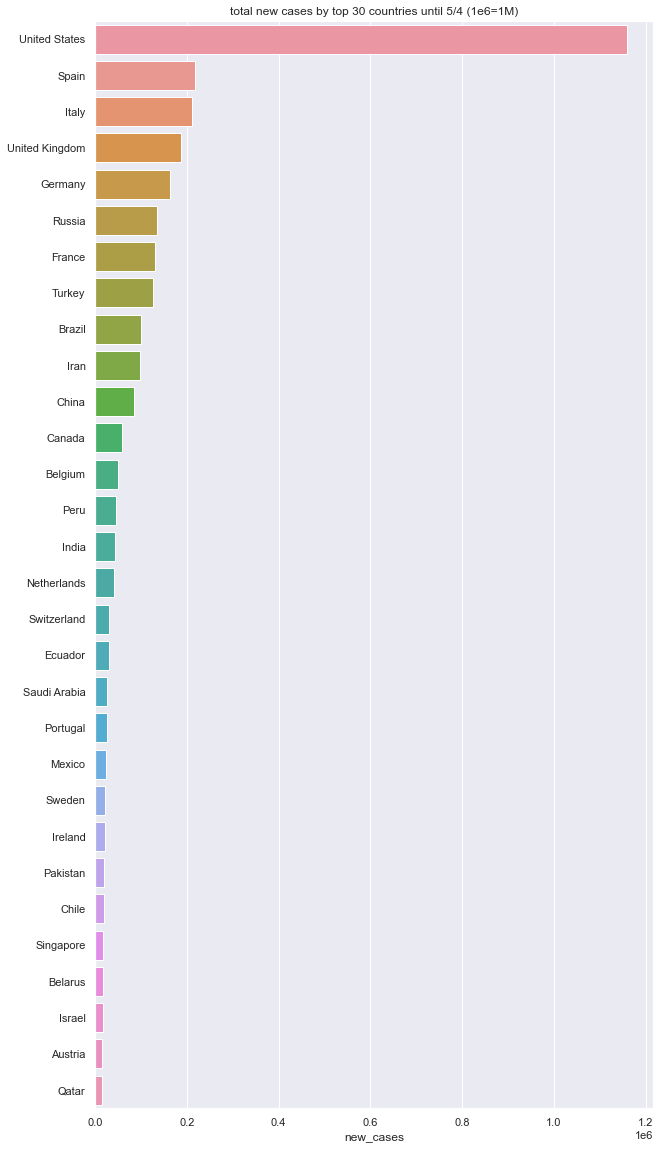

In [11]:
plt.figure(figsize=(10,20))
sns.barplot(y=countries, x=df_c_30)
# plt.barh(countries,df_c)
# plt.xlabel('No_suicide/100k pop')
# plt.ylabel('Countries')
plt.title('total new cases by top 30 countries until 5/4 (1e6=1M)')

plt.show()


In [12]:
pivot_df_c=ndf.pivot_table('total_cases_per_million', index='date', columns='location')

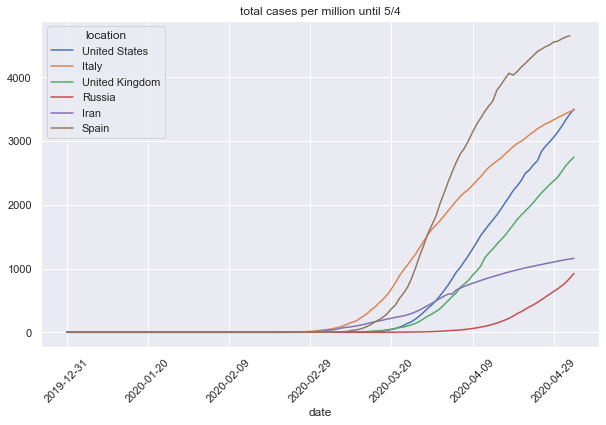

In [13]:
pivot_df_c[['United States', 'Italy', 'United Kingdom', 'Russia','Iran','Spain']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.title('total cases per million until 5/4')
plt.show()

In [14]:
pivot_df_newcases=ndf.pivot_table('new_cases', index='date',aggfunc=np.sum) #global new cases by day

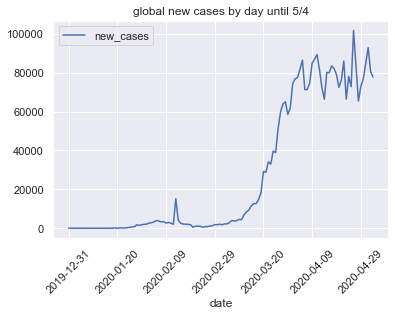

In [15]:
pivot_df_newcases.plot()
plt.xticks(rotation=45)
plt.title('global new cases by day until 5/4')
plt.show()

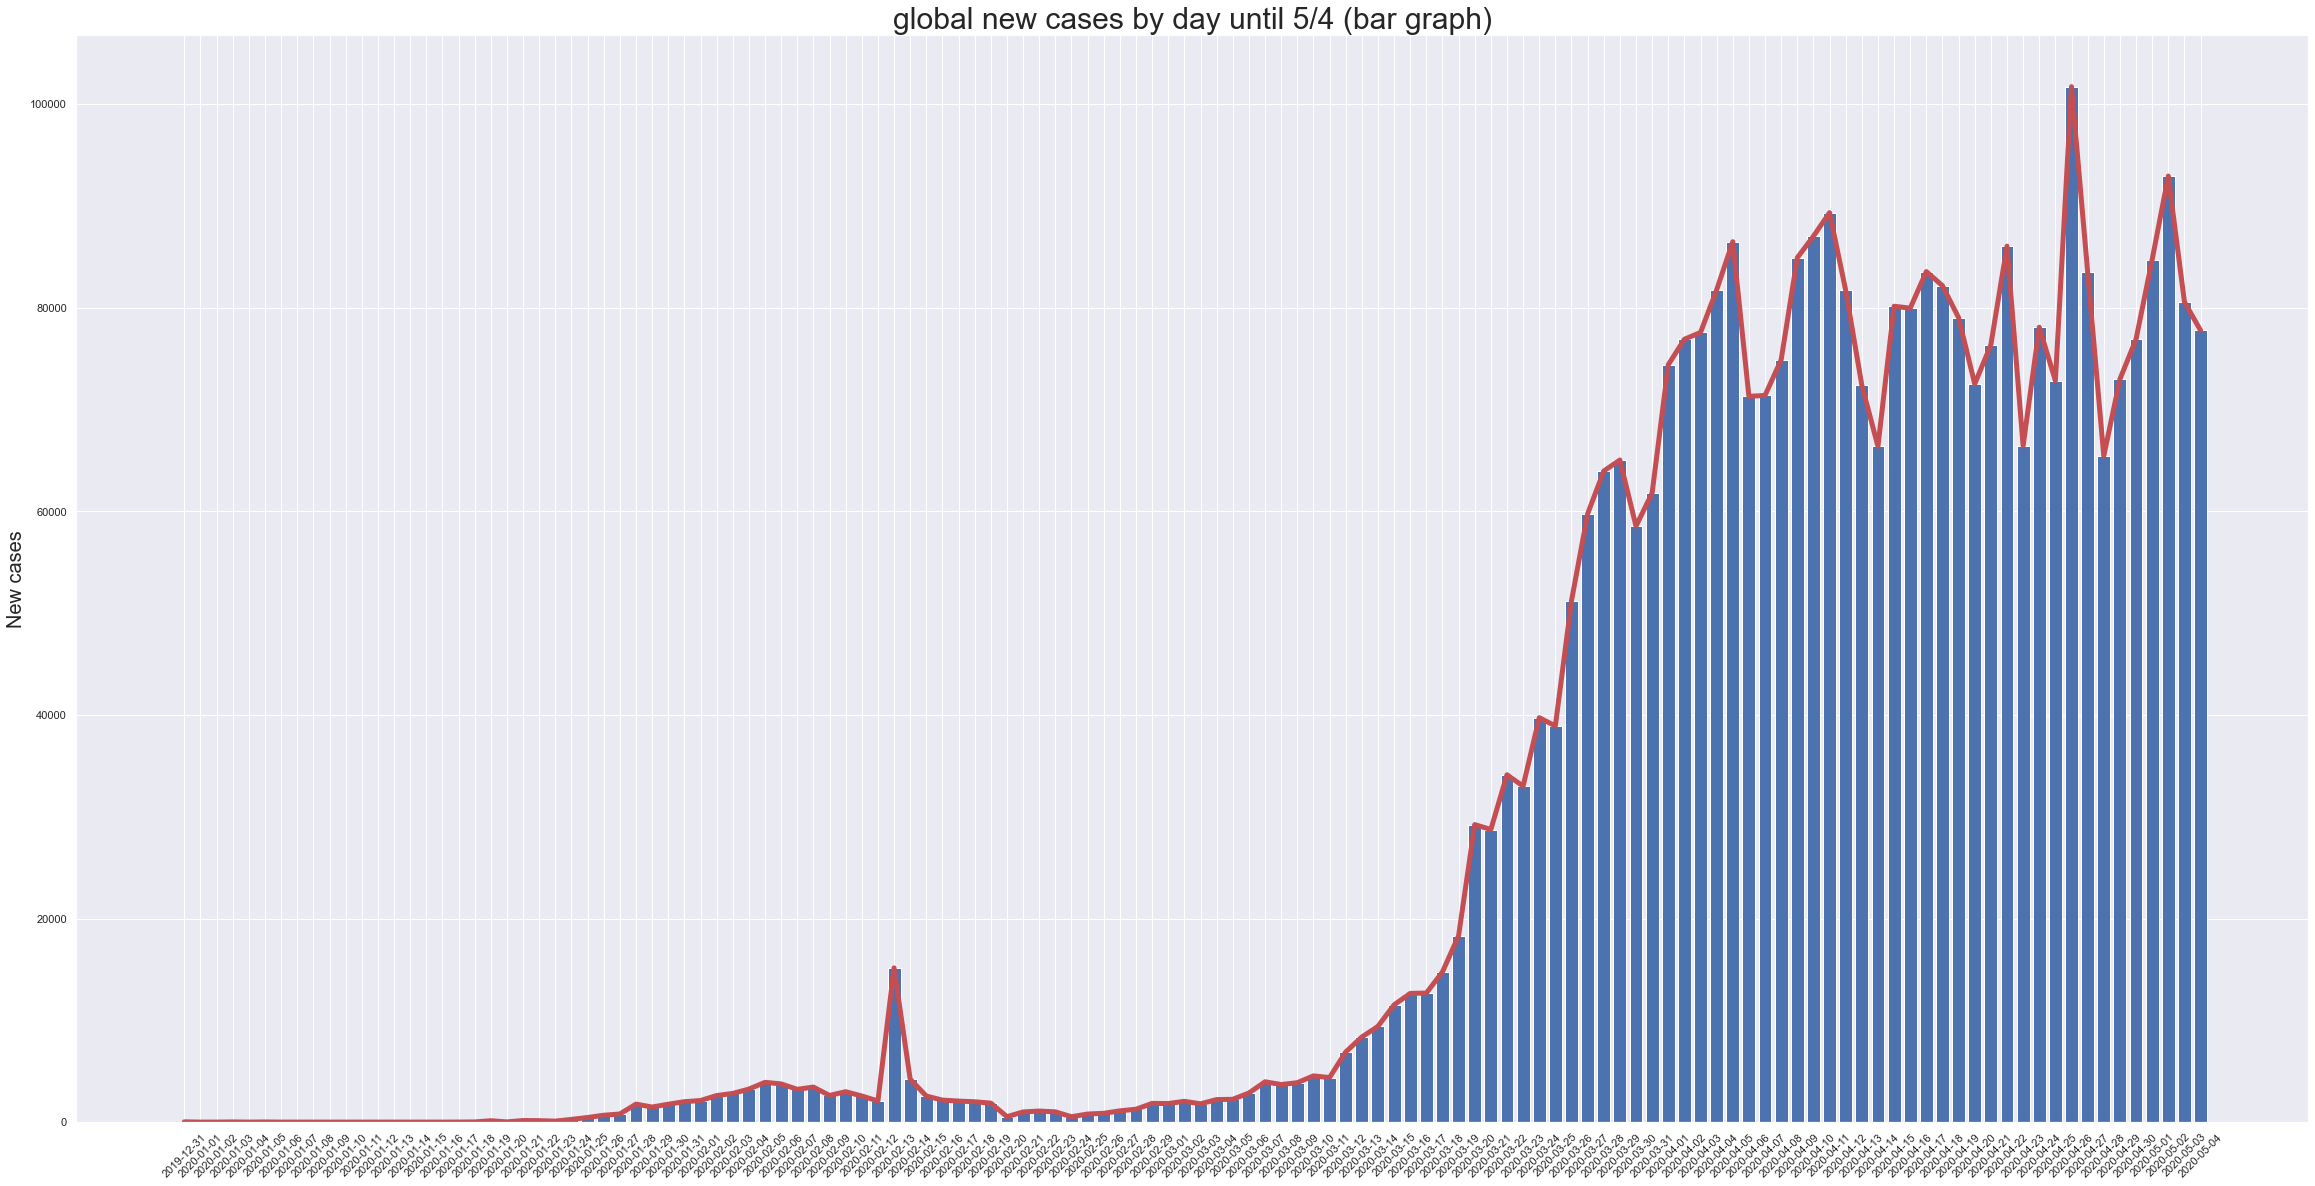

In [16]:
x = pivot_df_newcases.index.values
y = pivot_df_newcases.values
y = y.reshape(126,)

plt.subplots(figsize=(40,20))
plt.plot(x,y,'r-',linewidth=5)
plt.bar(x,y)
# ax.set(title='Globale New cases', ylabel='New cases', xlabel='date')

plt.xticks(rotation=45)
plt.ylabel('New cases',fontsize=20)
plt.title('global new cases by day until 5/4 (bar graph)', fontsize=30)
plt.show()

In [17]:
pivot_df_totalcases=ndf.pivot_table('total_cases', index='date',aggfunc=np.sum)

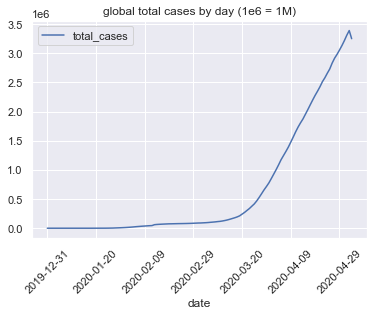

In [18]:
pivot_df_totalcases.plot()
plt.xticks(rotation=45)
plt.title('global total cases by day (1e6 = 1M)')
plt.show()

## Predictor(use Total cases to predict total deaths)

In [19]:
import pandas as pd
import numpy as np

df = pd.read_csv('owid-covid-data.csv')

In [20]:
df.head(5)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15128 entries, 0 to 15127
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   iso_code                  14938 non-null  object 
 1   location                  15128 non-null  object 
 2   date                      15128 non-null  object 
 3   total_cases               15128 non-null  int64  
 4   new_cases                 15128 non-null  int64  
 5   total_deaths              15128 non-null  int64  
 6   new_deaths                15128 non-null  int64  
 7   total_cases_per_million   14836 non-null  float64
 8   new_cases_per_million     14836 non-null  float64
 9   total_deaths_per_million  14836 non-null  float64
 10  new_deaths_per_million    14836 non-null  float64
 11  total_tests               3747 non-null   float64
 12  new_tests                 3347 non-null   float64
 13  total_tests_per_thousand  3747 non-null   float64
 14  new_te

In [22]:
df.isnull().sum() 
# make sure no null data in target variable and predictor variable which is total_deaths and total_cases

iso_code                      190
location                        0
date                            0
total_cases                     0
new_cases                       0
total_deaths                    0
new_deaths                      0
total_cases_per_million       292
new_cases_per_million         292
total_deaths_per_million      292
new_deaths_per_million        292
total_tests                 11381
new_tests                   11781
total_tests_per_thousand    11381
new_tests_per_thousand      11776
tests_units                 11381
dtype: int64

In [23]:
df=df[df.location != 'World']

In [24]:
pdf = df.pivot_table(['total_cases', 'total_deaths'], index='date',aggfunc='sum')
pdf.tail(5)

,total_cases,total_deaths
date,,
2020-04-30,3130606,227312
2020-05-01,3215335,232844
2020-05-02,3308270,238700
2020-05-03,3388853,243469
2020-05-04,3249159,221708


In [25]:
x = np.array(pdf['total_cases'].reset_index(drop=True))

In [26]:
y = np.array(pdf['total_deaths'].reset_index(drop=True))

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)

In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(100,)
(26,)
(100,)
(26,)


In [29]:
x_train= x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(100, 1)
(26, 1)
(100, 1)
(26, 1)


In [31]:
from sklearn.linear_model import Lasso
model = Lasso()

In [32]:
model.fit(x_train,y_train)

Lasso()

In [33]:
y_predict_train = model.predict(x_train)

Check R2 score for train and test data

In [34]:
from sklearn.metrics import r2_score
print('R2 score on train data is {}'.format(r2_score(y_train,y_predict_train)))

R2 score on train data is 0.993275798251033


In [35]:
y_predict_test = model.predict(x_test)

In [36]:
print('R2 score on test data is {}'.format(r2_score(y_test,y_predict_test)))

R2 score on test data is 0.9905101301065871
